## 모비율검정

- 2sample test

## 양측검정,단측검정
출처: https://dbrang.tistory.com/1407

- 양측 검정이 단측 검정보다 위험도가 낮다.
- 위 사진에서 볼 수 있듯이, 기각역이 양측 검정이 단측 검정보다 끝 쪽에 있기 때문에 H_0를 채택할 확률이 높아진다. 
    - 그렇기 때문에 양측 검정은 H_0를 채택하고자 할 때 (즉, 두 값이 같음을 보이고자 할 때) 사용한다. 
    - 반면에 단측 검정은 H_1을 채택하고자 할 때 (즉, 한쪽 값이 더 크다는 것을 보이고자 할 때) 사용한다.
<br>
- m - m_0 >0 이면 우측검정
- m - m_0 <0 이면 좌측검정
    * 이번 검정의 경우 푸시 이후 리텐션이 더 좋다는 것이므로 좌측검정(차이가 0보다 작다) 수행

## 요약
푸시 받지않은 유저 리텐션 = x, 푸시 받은유저 리텐션 = y라 하면, 귀무가설과 대립가설은 다음과 같다.

* H_0: x = y (리텐션 변화가 없다)
* H_1: x - y < 0 (리텐션 증가한다)


## two-sample proportion_ztest in python
* 파라미터
> * count
    * 각각 독립적인 샘플에서 성공한 횟수 (이경우 실험군, 대조군 각각의 재방문 유저수)
> * nob 
    * 전체 관찰 횟수 (이경우 실험군,대조군 각각의 총 유저수)

* 결과값
> * zstat
    * test statistic for the z-test
> * p-value
    * p-value for the z-test

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

-------
### 예제
- ex) 복날에 A회사 사람들 300명 중 100명이 삼계탕을 먹었고, B회사 사람들 400명 중 170명이 삼계탕을 먹었다. 비율이 같은가?

> 귀무가설이 두 prop이 같다 (prop[0] = prop[1])이므로 <br>
> p-value <0.05 로 기각되어야 두개가 다르다고 할 수 있음.


In [1]:
count = np.array([100, 170])
nobs = np.array([300, 400])

z, p = proportions_ztest(count=count, nobs=nobs, value=0)
print(z)
print(p)

-2.4656701201792273
0.013675721698622408


In [2]:
count

array([100, 170])

----------
### 데이터 불러오기

In [14]:
df=pd.read_csv('./profile_push_retention.csv')
df.drop('Unnamed: 7', axis = 1, inplace = True)

In [272]:
df

,push_dt,grp,users,D0toD1,D0toD6,D0toD1_retention_rate,D0toD6_retention_rate
0,2021.6.15,control,8642,1140,2438,13.19,28.21
1,2021.6.15,exp,8541,1148,2440,13.44,28.57
2,2021.6.16,control,8451,1110,2287,13.13,27.06
3,2021.6.16,exp,8500,1316,2436,15.48,28.66
4,2021.6.17,control,8389,1252,2428,14.92,28.94
5,2021.6.17,exp,8354,1469,2506,17.58,30.00
6,2021.6.18,control,9105,1498,2769,16.45,30.41
7,2021.6.18,exp,9142,1680,2919,18.38,31.93
8,2021.6.19,control,9513,1699,3147,17.86,33.08
9,2021.6.19,exp,9555,1849,3226,19.35,33.76


### D0toD1 , D0toD6 리텐션 모비율검정

In [355]:
ret_col=df.iloc[:,3:5].columns.tolist()
df_ret_test=pd.DataFrame(df['push_dt'].unique(),columns=['dt'])

for col in ret_col:
    users_list=[]
    ret_list=[]
    for i in range(0,len(df),2):
        u=np.array([df[i:i+2]['users'][i], df[i:i+2]['users'][i+1]])
        users_list.append(u) # users_list=7개
    
        r=np.array([df[i:i+2][col][i], df[i:i+2][col][i+1]])
        ret_list.append(r)  #ret_list=7개*2=14개

        ########## two-sample proportions_ztest
        result_list=[]
        for j in range(len(users_list)):
            result=0
            
            u_list=users_list[j]
            r_list=ret_list[j]

            # p1 < p2 임을 증명하고 싶기 때문에 alternatvie='smaller' 그 반대이면 'larger'
            z,p=proportions_ztest(count=r_list,nobs=u_list,alternative='smaller')

            # p-value가 0.05보다 작으면 1, 0.05보다 크면 0으로 전처리
            if p <=0.05:
                result=1
            else:
                result=0
            result_list.append(result)
    df_test=pd.DataFrame(result_list,columns=[col])
    df_ret_test=pd.concat([df_ret_test,df_test],axis=1)
df_ret_test=df_ret_test.set_index('dt')
df_ret_test

,D0toD1,D0toD6
dt,,
2021.6.15,0,0
2021.6.16,1,1
2021.6.17,1,0
2021.6.18,1,1
2021.6.19,1,0
2021.6.20,1,1
2021.6.21,1,1


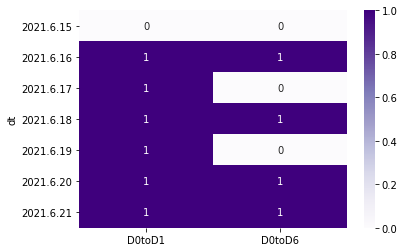

In [354]:
# 1이면 유의하게 차이나는것을 의미.
sns.heatmap(df_ret_test[['D0toD1','D0toD6']],cmap="Purples",annot=True);

#### 1) D0toD1 값 유의성 검정

In [261]:
users_list=[]
ret_list=[]
for i in range(0,len(df),2):
    u=np.array([df[i:i+2]['users'][i], df[i:i+2]['users'][i+1]])
    users_list.append(u)
    r=np.array([df[i:i+2]['D0toD6'][i], df[i:i+2]['D0toD6'][i+1]])
    ret_list.append(r)
print(users_list)
print(ret_list)

[array([8642, 8541]), array([8451, 8500]), array([8389, 8354]), array([9105, 9142]), array([9513, 9555]), array([9432, 9534]), array([9875, 9792])]
[array([2438, 2440]), array([2287, 2436]), array([2428, 2506]), array([2769, 2919]), array([3147, 3226]), array([2918, 3160]), array([2815, 2954])]


In [209]:
result_list=[]
for i in range(len(users_list)):
    result=0
    u=users_list[i]
    r=ret_list[i]
    print(u,r)
    
    # p1 < p2 임을 증명하고 싶기 때문에 alternatvie='smaller' 그 반대이면 'larger'
    z,p=proportions_ztest(count=r,nobs=u,alternative='smaller')
    
    # p-value가 0.05보다 작으면 1, 0.05보다 크면 0으로 전처리
    if p <=0.05:
        result=1
    else:
        result=0
    result_list.append(result)
    
    D0toD1_test=pd.DataFrame(result_list,columns=['D0toD1_test'])
    print('value :',z)
    print('p-value:',p)
    print('result:',result)
    print('------------------------')

[8642 8541] [1140 1148]
value : -0.4816244387538022
p-value: 0.31503638105714793
result: 0
------------------------
[8451 8500] [1110 1316]
value : -4.364365812388803
p-value: 6.374603969269217e-06
result: 1
------------------------
[8389 8354] [1252 1469]
value : -4.664931222629985
p-value: 1.5436013941997472e-06
result: 1
------------------------
[9105 9142] [1498 1680]
value : -3.426832103429252
p-value: 0.00030533325945095505
result: 1
------------------------
[9513 9555] [1699 1849]
value : -2.6458779724627624
p-value: 0.004073960160890137
result: 1
------------------------
[9432 9534] [1445 1794]
value : -6.398154674699644
p-value: 7.863296897480114e-11
result: 1
------------------------
[9875 9792] [1613 1778]
value : -3.3848696325251377
p-value: 0.0003560603373949104
result: 1
------------------------


#### 2)D0toD6 값 유의성 검정

In [218]:
users_list=[]
ret_list=[]
for i in range(0,len(df),2):
    u=np.array([df[i:i+2]['users'][i], df[i:i+2]['users'][i+1]])
    users_list.append(u)
    
    r=np.array([df[i:i+2]['D0toD6'][i], df[i:i+2]['D0toD6'][i+1]])
    ret_list.append(r)

result_list=[]
for i in range(len(users_list)):
    result=0
    u=users_list[i]
    r=ret_list[i]
    
    # p1 < p2 임을 증명하고 싶기 때문에 alternatvie='smaller' 그 반대이면 'larger'
    z,p=proportions_ztest(count=r,nobs=u,alternative='smaller')
    
    # p-value가 0.05보다 작으면 1, 0.05보다 크면 0으로 전처리
    if p <=0.05:
        result=1
    else:
        result=0
    result_list.append(result)
    
    D0toD6_test=pd.DataFrame(result_list,columns=['D0toD6_test'])

In [222]:
df_ret_test=pd.DataFrame(df['push_dt'].unique(),columns=['dt'])
df_ret_test=pd.concat([df_ret_test,D0toD1_test,D0toD6_test],axis=1)
df_ret_test=df_ret_test.set_index('dt')
df_ret_test

,D0toD1_test,D0toD6_test
dt,,
2021.6.15,0,0
2021.6.16,1,1
2021.6.17,1,0
2021.6.18,1,1
2021.6.19,1,0
2021.6.20,1,1
2021.6.21,1,1


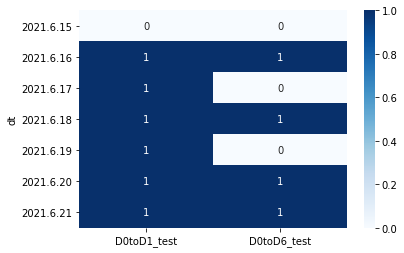

In [224]:
# 1이면 유의하게 차이나는것을 의미.
sns.heatmap(df_ret_test[['D0toD1_test','D0toD6_test']],cmap="Blues",annot=True);